<a href="https://colab.research.google.com/github/sakinahindriyani/H8_PTP_Final_Image/blob/master/CatDog_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
!nvidia-smi

Mon Apr 20 14:44:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    32W /  70W |   1149MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

#Introduction

Hello! My name is Sakinah Indriyani. In this project, I'm making the Cat & Dog Classification using Convolutional Neural Network (CNN). My main goal is to build a model that can classify cat & dog correctly. This project will also help me understand how Image Classification works in Deep Learning.







## Import Library

Import the library that will be needed for this Cat & Dog Classification

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image

# importing libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [156]:
#Check my tensorflow version
tf.__version__

'2.2.0-rc3'

## Load Dataset

Get the dataset by downloading. Then it will remove the existing data if there's any and unzip the downloaded dataset.


In [157]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2020-04-20 14:45:11--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 2404:6800:4003:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.2’

cats_and_dogs_filte 100%[===================>]  65.43M  62.5MB/s    in 1.0s    

2020-04-20 14:45:13 (62.5 MB/s) - ‘cats_and_dogs_filtered.zip.2’ saved [68606236/68606236]



In [0]:
!rm -r /content/cats_and_dogs_filtered

In [0]:
!unzip -q /content/cats_and_dogs_filtered.zip

Initiate parameter

In [0]:
path = "/content/cats_and_dogs_filtered" #@param {type:"string"}
batch_size =  32#@param {type:"integer"}
image_size =  100#@param {type:"integer"}

In [0]:
train_path = path + "/train"
test_path = path + "/validation"


train_path_cats = train_path + '/cats'
train_path_dogs = train_path + '/dogs'
test_path_cats = test_path + '/cats'
test_path_dogs = test_path + '/dogs'

Check the number of data

In [163]:
print('number of cats training images - ',len(os.listdir(train_path_cats)))
print('number of dogs training images - ',len(os.listdir(train_path_dogs)))
print('number of cats testing images - ',len(os.listdir(test_path_cats)))
print('number of dogs testing images - ',len(os.listdir(test_path_dogs)))

number of cats training images -  1000
number of dogs training images -  1000
number of cats testing images -  500
number of dogs testing images -  500


## Preprocessing

This ImageDataGenerator will be used to preprocess the image dataset

In [0]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0)

In [165]:
training_data = data_generator.flow_from_directory(directory = train_path,
                                                   target_size = (image_size, image_size),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary',
                                                   shuffle=True,
                                                   seed=1)
testing_data = data_generator.flow_from_directory(directory = test_path,
                                                  target_size = (image_size, image_size),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary',
                                                  shuffle=True,
                                                  seed=1)
test = data_generator.flow_from_directory(directory = test_path, batch_size=1,
                                                  target_size = (image_size, image_size),
                                                  class_mode = 'binary',
                                                  seed=10)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Plot the example images

In [0]:
class_names = ['cats','dogs']
image_train, label_train = next(training_data)
image_test, label_test = next(testing_data)

In [0]:
def show_image(image, label):
    plt.figure(figsize=(10,10))
    i = 1
    for n in range(25):
        plt.subplot(5, 5, i)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image[n], cmap=plt.cm.binary)
        plt.title("Class: {}".format(class_names[label[n]==1].title()))
        i += 1
    return plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # Remove the CWD from sys.path while we load stuff.


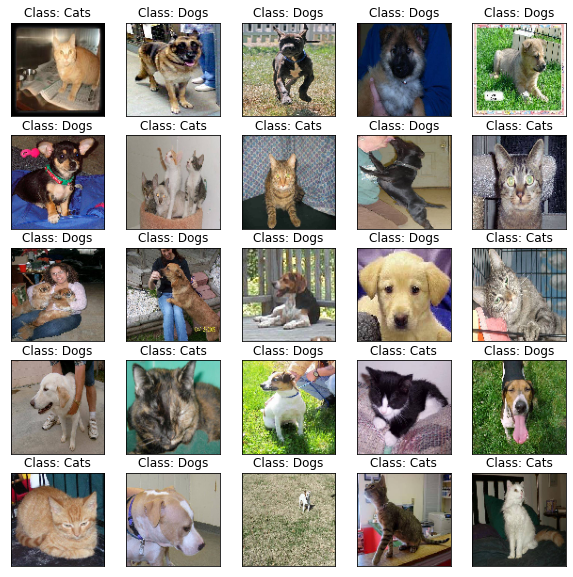

In [168]:
show_image(image_train, label_train)

## Define Model

In [184]:
# preparing the layers in the Convolutional Deep Neural Network
def load_model():
  model = Sequential()
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(Dropout(rate = 0.3))
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(Dropout(rate = 0.2))
  model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(Dropout(rate = 0.15))
  model.add(Flatten())
  model.add(Dense(units = 32, activation = 'relu'))
  model.add(Dropout(rate = 0.15))
  model.add(Dense(units = 64, activation = 'relu'))
  model.add(Dropout(rate = 0.1))
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
  return model
model = load_model()

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 21, 21, 126)      

In [185]:
fitted_model = model.fit(training_data,
                        steps_per_epoch = 2000 // batch_size,
                        epochs = 100,
                        validation_data = testing_data,
                        validation_steps = 1000 // batch_size,
                        callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/100
62/62 [==============================] - 7s 119ms/step - loss: 0.6955 - accuracy: 0.5254 - val_loss: 0.6918 - val_accuracy: 0.5331
Epoch 2/100
62/62 [==============================] - 7s 117ms/step - loss: 0.6915 - accuracy: 0.5254 - val_loss: 0.6872 - val_accuracy: 0.5826
Epoch 3/100
62/62 [==============================] - 7s 119ms/step - loss: 0.6768 - accuracy: 0.5747 - val_loss: 0.6766 - val_accuracy: 0.5620
Epoch 4/100
62/62 [==============================] - 7s 117ms/step - loss: 0.6772 - accuracy: 0.5640 - val_loss: 0.6495 - val_accuracy: 0.6085
Epoch 5/100
62/62 [==============================] - 7s 118ms/step - loss: 0.6573 - accuracy: 0.5894 - val_loss: 0.6377 - val_accuracy: 0.6240
Epoch 6/100
62/62 [==============================] - 7s 116ms/step - loss: 0.6350 - accuracy: 0.6174 - val_loss: 0.6172 - val_accuracy: 0.6601
Epoch 7/100
62/62 [==============================] - 7s 117ms/step - loss: 0.5989 - accuracy: 0.6829 - val_loss: 0.6214 - val_accuracy: 0.6570

In [186]:
model.evaluate(testing_data, steps=1000//batch_size)

31/31 [==============================] - 2s 73ms/step - loss: 0.7843 - accuracy: 0.7386


[0.7842687368392944, 0.7386363744735718]

## Plot the accuracy meter

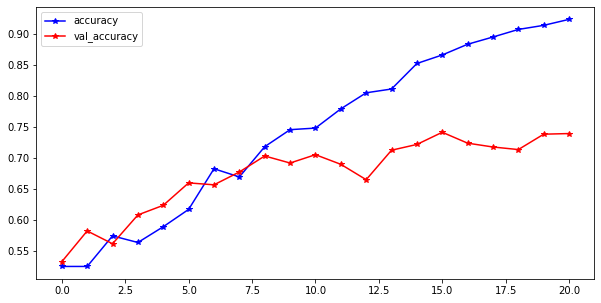

In [187]:
# plotting accuracy and validation accuracy
plt.figure(figsize=(10,5)) 

accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b*-', label = 'accuracy')
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(val_accuracy)), val_accuracy, 'r*-', label = 'val_accuracy')
plt.legend()

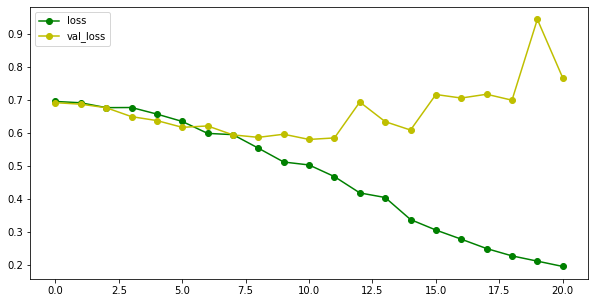

In [188]:
plt.figure(figsize=(10,5)) 
loss = fitted_model.history['loss']
plt.plot(range(len(loss)), loss, 'go-', label = 'loss')
val_loss = fitted_model.history['val_loss']
plt.plot(range(len(val_loss)), val_loss, 'yo-', label = 'val_loss')
plt.legend()

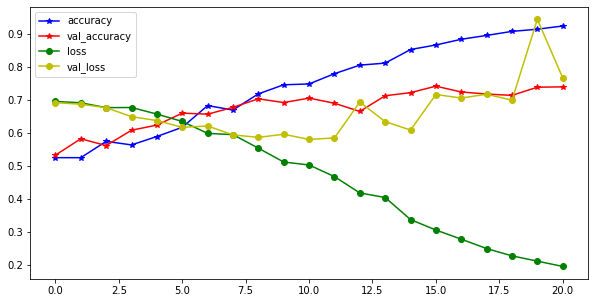

In [189]:
plt.figure(figsize=(10,5)) 

accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b*-', label = 'accuracy')
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(val_accuracy)), val_accuracy, 'r*-', label = 'val_accuracy')
loss = fitted_model.history['loss']
plt.plot(range(len(loss)), loss, 'go-', label = 'loss')
val_loss = fitted_model.history['val_loss']
plt.plot(range(len(val_loss)), val_loss, 'yo-', label = 'val_loss')
plt.legend()

Predict one picture

In [0]:
random = 3
image, label = test[random]
pred = model.predict(image)

In [191]:
print("preds:", np.argmax(pred, axis=1))
print("label:", label)

preds: [0]
label: [0.]


Text(0.5, 0, 'label : cat | pred : cat')

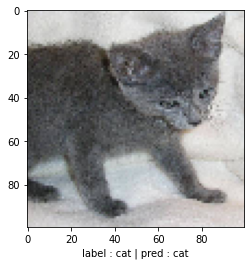

In [192]:
def getLabel(kelas):
  if int(kelas) == 0:
    return 'cat'
  else:
    return 'dog'
plt.imshow(image[0])
plt.xlabel("label : " + getLabel(label) + " | pred : " + getLabel(pred))

## Try with Data Augmentation

In [0]:
data_aug_generator = ImageDataGenerator(rescale=1.0/255.0,horizontal_flip=True,zoom_range=0.2,rotation_range=30)

In [194]:
training_data_aug = data_aug_generator.flow_from_directory(directory = train_path,
                                                           target_size = (image_size, image_size),
                                                           batch_size = batch_size,
                                                           class_mode = 'binary',
                                                           shuffle=True,
                                                           seed=1)

Found 2000 images belonging to 2 classes.


Plot the augmented images

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(25,25))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [0]:
augmented_images = [training_data_aug[0][0][0] for i in range(5)]

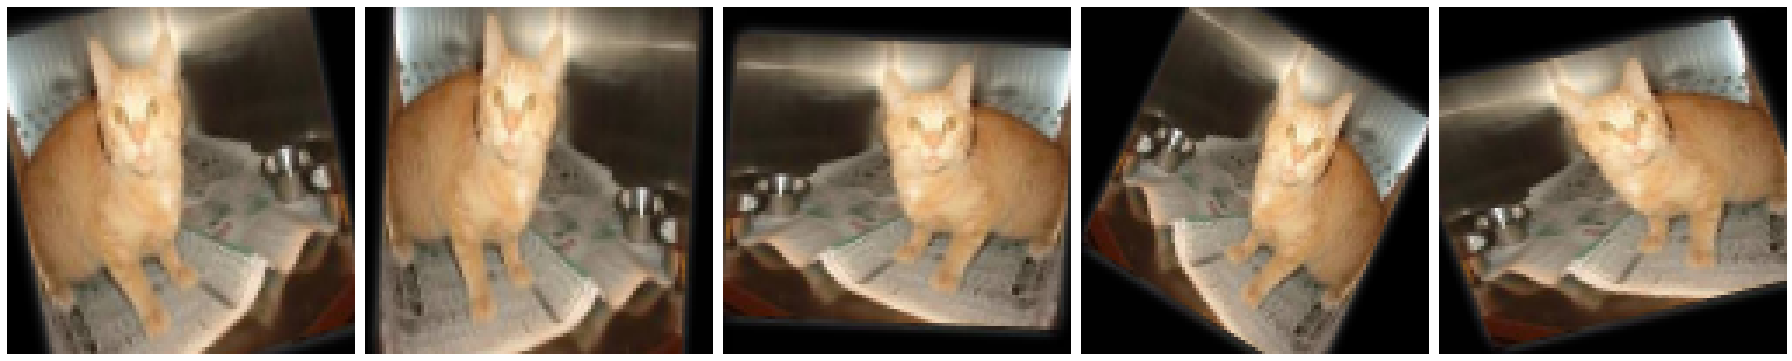

In [197]:
plotImages(augmented_images)

## Define model for data that augmented

In [200]:
# preparing the layers in the Convolutional Deep Neural Network
model_aug = load_model()

model_aug.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 21, 21, 126)      

In [201]:
fitted_model = model_aug.fit(training_data_aug,
                        steps_per_epoch = 2000*2 // batch_size,
                        epochs = 100,
                        validation_data = testing_data,
                        validation_steps = 1000 // batch_size,
                        callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/100
125/125 [==============================] - 20s 158ms/step - loss: 0.6944 - accuracy: 0.5098 - val_loss: 0.6887 - val_accuracy: 0.5207
Epoch 2/100
125/125 [==============================] - 20s 156ms/step - loss: 0.6888 - accuracy: 0.5247 - val_loss: 0.6936 - val_accuracy: 0.4990
Epoch 3/100
125/125 [==============================] - 19s 155ms/step - loss: 0.6854 - accuracy: 0.5393 - val_loss: 0.6832 - val_accuracy: 0.5455
Epoch 4/100
125/125 [==============================] - 20s 157ms/step - loss: 0.6905 - accuracy: 0.5234 - val_loss: 0.6754 - val_accuracy: 0.5548
Epoch 5/100
125/125 [==============================] - 19s 155ms/step - loss: 0.6871 - accuracy: 0.5204 - val_loss: 0.6828 - val_accuracy: 0.5351
Epoch 6/100
125/125 [==============================] - 19s 155ms/step - loss: 0.6865 - accuracy: 0.5378 - val_loss: 0.6703 - val_accuracy: 0.5671
Epoch 7/100
125/125 [==============================] - 19s 156ms/step - loss: 0.6588 - accuracy: 0.5902 - val_loss: 0.6503 -

In [207]:
model_aug.evaluate(testing_data, steps=1000//batch_size)

31/31 [==============================] - 2s 73ms/step - loss: 0.5604 - accuracy: 0.7603


[0.5604267120361328, 0.7603305578231812]

## Plot the accuracy meter

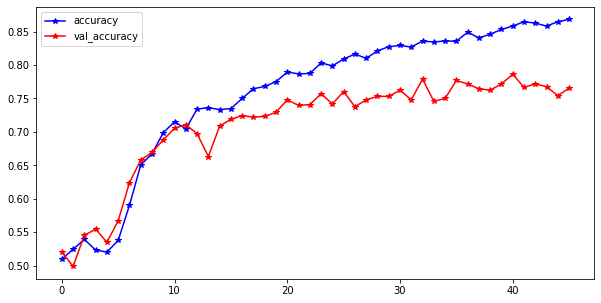

In [208]:
# plotting accuracy and validation accuracy
plt.figure(figsize=(10,5)) 

accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b*-', label = 'accuracy')
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(val_accuracy)), val_accuracy, 'r*-', label = 'val_accuracy')
plt.legend()

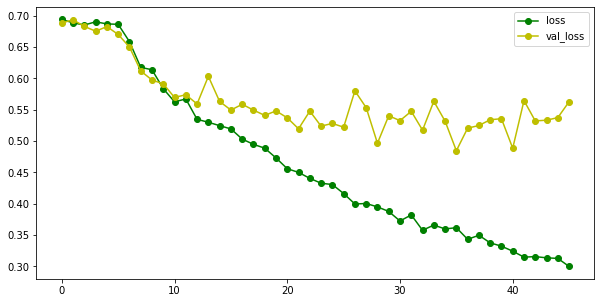

In [209]:
plt.figure(figsize=(10,5)) 
loss = fitted_model.history['loss']
plt.plot(range(len(loss)), loss, 'go-', label = 'loss')
val_loss = fitted_model.history['val_loss']
plt.plot(range(len(val_loss)), val_loss, 'yo-', label = 'val_loss')
plt.legend()

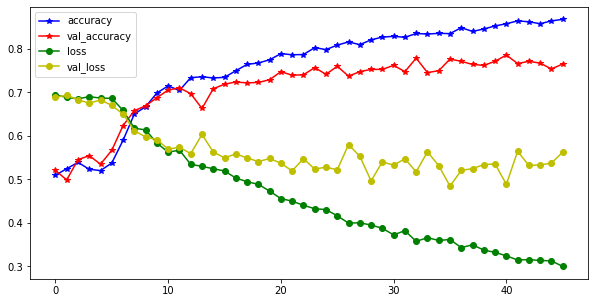

In [210]:
plt.figure(figsize=(10,5)) 

accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b*-', label = 'accuracy')
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(val_accuracy)), val_accuracy, 'r*-', label = 'val_accuracy')
loss = fitted_model.history['loss']
plt.plot(range(len(loss)), loss, 'go-', label = 'loss')
val_loss = fitted_model.history['val_loss']
plt.plot(range(len(val_loss)), val_loss, 'yo-', label = 'val_loss')
plt.legend()

In [211]:
test = data_generator.flow_from_directory(directory = test_path, batch_size=1,
                                                  target_size = (image_size, image_size),
                                                  class_mode = 'binary',
                                                  seed=10)
random = 6
image, label = test[random]
pred = model_aug.predict(image)

Found 1000 images belonging to 2 classes.


preds: [0]
label: [0.]


Text(0.5, 0, 'label : cat | pred : cat')

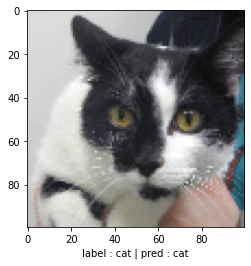

In [212]:
print("preds:", np.argmax(pred, axis=1))
print("label:", label)
plt.imshow(image[0])
plt.xlabel("label : " + getLabel(label) + " | pred : " + getLabel(pred))

## Summarization

The 1st experiment I tried a simple model with small epochs but it gave an accuracy around 50%-60% for the validation. Then I did a hyperparameter for the model. I use a different number of filter in convolution layer and units in dense layer, it reaches 72% accuracy.
To increase the accuracy, I tried to use data augmentation with adding number of filter in convolution and units in dense layer. It reaches the train accuracy to 85% and validation to 80%.